# Lab - Filtragem por blocos

Esta atividade propõe a realização da filtragem por blocos. 
Primeiramente a EDCC é aplicada com e sem as condições inicias (do bloco anterior) para se verificar a diferença.
Depois é verificado o efeito da convolução circular devido ao produto no domínio da frequência e os métodos *overlap-add* e *overlap-save*.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import lfilter, freqz, firwin

1) Considere para n=0...63, o sinal $x[n]$, a soma de três senoides.

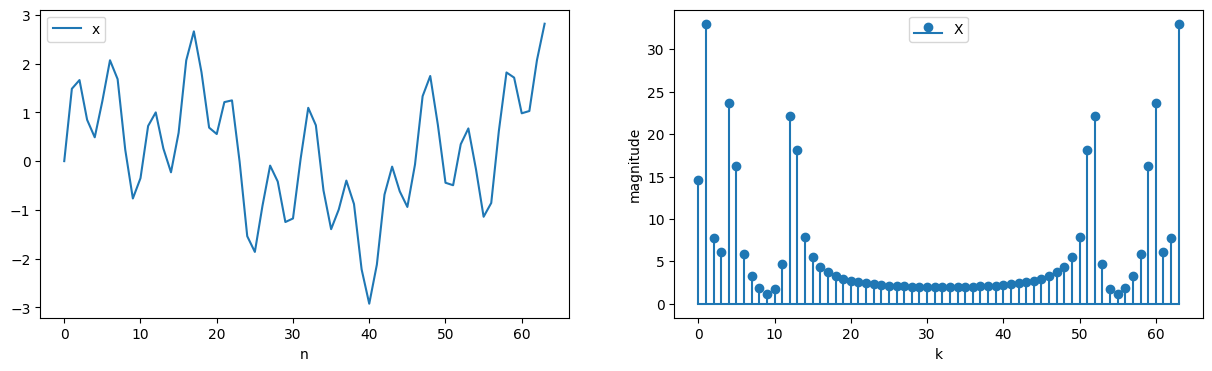

In [2]:
N=64
n=arange(N)
x0=sin(1.3*pi*n/32)
x1=sin(4.4*pi*n/32)
x2=sin(12.4*pi*n/32)
x=x0+x1+x2

figure(figsize=(15,4))
subplot(1,2,1)
plot(x,label='x')
legend()
xlabel('n')
subplot(1,2,2)
stem(abs(fft(x)),basefmt='C0', label='X')
legend()
xlabel('k')
ylabel('magnitude')
show()

2) Obtenha os coeficientes de um filtro fir de ordem 15 com frequência normalizada de corte igual a 0,25 ($w=\pi/4$). Visualize a resposta ao impulso deste filtro. Em outro gráfico, visualize a resposta em frequência do filtro e a DFT do sinal $x[n]$ no mesmo eixo, para frequências de 0 a $\pi$.

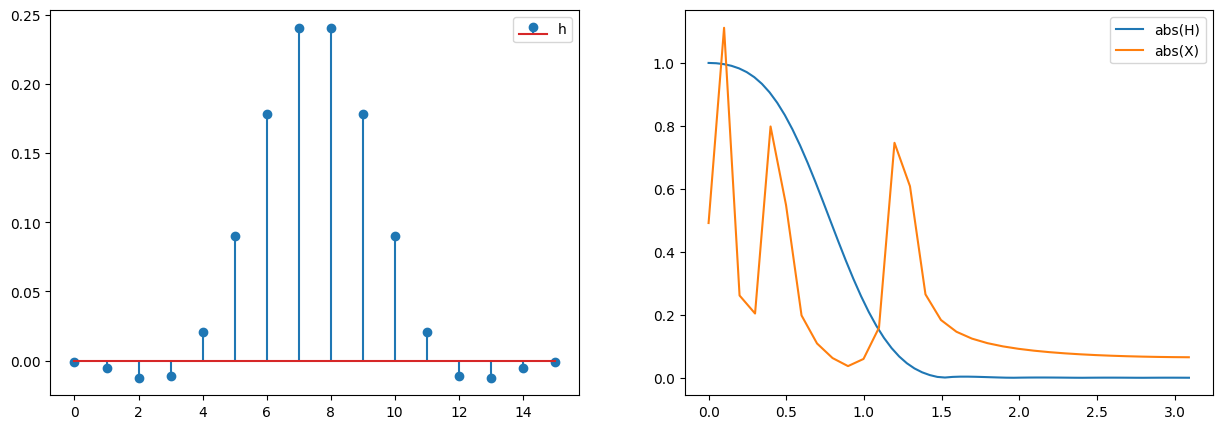

In [79]:
w_esperado = pi/4
ordem = 15
filter_coefficients = firwin(ordem + 1, w_esperado, fs=2*pi)
w, h = freqz(filter_coefficients,1 , N)
w_x = linspace(0,2*pi, len(x))
X = fft(x)
figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
stem(filter_coefficients, label="h")
legend()
plt.subplot(1, 2, 2)
plot(w,abs(h), label = "abs(H)")
plot(w_x[:32], (abs(X)/max(X.real))[:32], label="abs(X)")
legend()
show()

3) Filtre o sinal $x[n]$ aplicando a equação recursiva de diferenças com os coeficientes do filtro (função lfilter()) obtendo $y[n]$ com 64 pontos. Depois repita esta operação nas duas metades do sinal x (n=0:32 e n=32:64), sem especificar as condições iniciais. O valor padrão considera as condições iniciais em repouso, portanto nulas. Em seguida, repita a operação nos dois blocos, mas considerando as condições iniciais como as condições finais do bloco anterior. Considerar as condições iniciais do primeiro bloco como zero. Plotar no mesmo gráfico o sinal filtrado y; as duas metades filtradas ya, yb; as duas metades filtras com condições iniciais especificadas ya0, yb0.

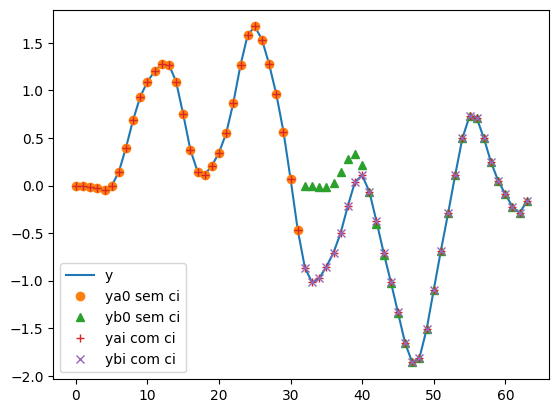

In [4]:
y = lfilter(filter_coefficients ,1, x)
ya0 = lfilter(filter_coefficients ,1, x[:32])
yb0 = lfilter(filter_coefficients ,1, x[32:64])
yai = lfilter(filter_coefficients ,1, x[:64])
ybi = lfilter(filter_coefficients ,1, x[0:64])
plt.plot(y, label = 'y')
plt.plot(ya0, marker = 'o', linestyle='None', label = 'ya0 sem ci')
plt.plot(range(32,64),yb0, marker = '^', linestyle='None', label = 'yb0 sem ci')
plt.plot(yai, marker = '+', linestyle='None', label = 'yai com ci')
plt.plot(range(32,64),ybi[32:], marker = 'x', linestyle='None', label = 'ybi com ci')
plt.legend()
plt.show()

4) Filtre o sinal $x[n]$, por blocos de 32 amostras, fazendo produto no domínio da frequência com a resposta em frequência do filtro $Y[k]=X[k] H[k]$ e obtendo $y2[n]=\text{ifft}(Y[k])$ para cada bloco (a, b). Esta abordagem equivale a convolução circular que não é exatamente igual à convolução. Plot o resultado de cada bloco juntamente com o sinal corretamente filtrado $y[n]$.


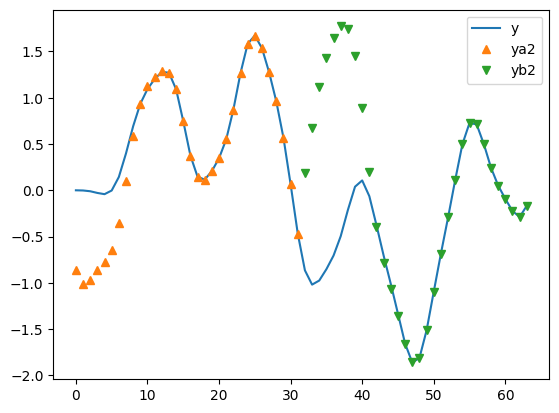

In [24]:
N_bloco=32
Xa = fft(x[:N_bloco])
Ya = Xa * fft(filter_coefficients, 32)
ya2 = ifft(Ya).real


Xb = fft(x[N_bloco:])
Yb = Xb * fft(filter_coefficients, 32)
yb2 = ifft(Yb).real

plt.plot(y, label = 'y')
plt.plot(ya2, marker = '^', linestyle='None', label = 'ya2')
plt.plot(range(32,64), yb2, marker = 'v', linestyle='None', label = 'yb2')

plt.legend()
plt.show()

5) filtre o sinal $x[n]$, por blocos de 32 amostras, mas completando cada bloco com mais 32 zeros, fazendo produto no domínio da frequência com a resposta em frequência do filtro $Y[k]=X[k] H[k]$ e obtendo $y3[n]=\text{ifft}(Y[k])$ com 64 valores. Sobreponha e some as duas respostas para obter $y3[n]$ pelo método *overlap-add*. Plot o resultado de cada bloco (y3a e y3b), juntamente com a soma (y3) o sinal corretamente filtrado y.


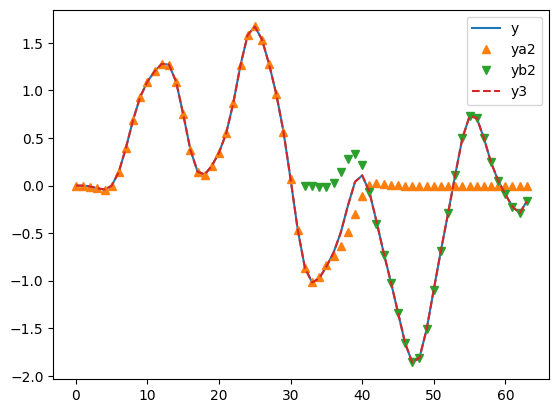

In [58]:
N_bloco=32
ya3 = np.zeros(N)
Xa3 = fft(concatenate((x[:N_bloco], zeros(N_bloco))))
Ya3 = Xa3 * fft(filter_coefficients, N)
ya3 += ifft(Ya3).real 

yb3 = np.zeros(N)
Xb3 = fft(concatenate((zeros(N_bloco),x[N_bloco:])))
Yb3 = Xb3 * fft(filter_coefficients, N)
yb3[N_bloco:]  += ifft(Yb3).real[N_bloco:] 

y3 = ya3+yb3

plt.plot(y, label = 'y')
plt.plot(ya3, marker = '^', linestyle='None', label = 'ya2')
plt.plot(range(32,64),yb3[N_bloco:], marker = 'v', linestyle='None', label = 'yb2')
plt.plot(y3, linestyle='--', label = 'y3')

plt.legend()
plt.show()

6) Filtre o sinal $x[n]$, por blocos de 32 amostras, sem completar cada bloco com mais 32 zeros, fazendo produto no domínio da frequência com a resposta em frequência do filtro $Y[k]=X[k] H[k]$ e obtendo $y4[n]=ifft(Y[k])$ com 32 amostras. Considere 3 blocos de 32 amostras com sobreposição de 16 amostras (n=0:32; n=16:48; n=32:64), para descartar as primeiras 16 amostras e resultar no segmento da convolução circular que é identico à convolução. Sobreponha as três respostas para obter $y4[n]$ pelo método *overlap-save*. Plote o resultado de cada bloco (y4a, y4b e y4c), juntamente com a sobreposição (y4) e o sinal corretamente filtrado y.


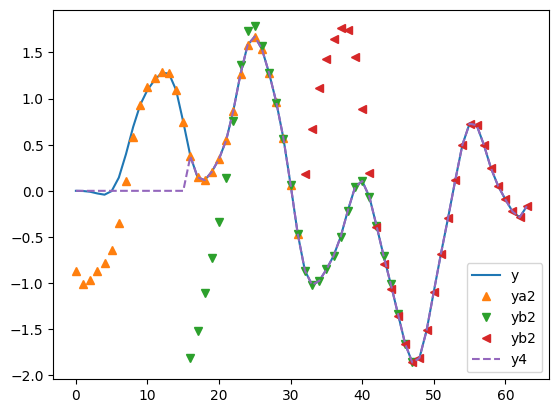

In [75]:
N_bloco=32
Xa4 = fft(x[:N_bloco])
Ya4 = Xa4 * fft(filter_coefficients, 32)
ya4 = ifft(Ya4).real


Xb4 = fft(x[16:48])
Yb4 = Xb4 * fft(filter_coefficients, 32)
yb4 = ifft(Yb4).real

Xc4 = fft(x[N_bloco:N])
Yc4 = Xc4 * fft(filter_coefficients, 32)
yc4 = ifft(Yc4).real

y4 = concatenate((zeros(16), ya4[16:],yb4[16:],yc4[16:]))

plt.plot(y, label = 'y')
plt.plot(ya4, marker = '^', linestyle='None', label = 'ya2')
plt.plot(range(16,48),yb4, marker = 'v', linestyle='None', label = 'yb2')
plt.plot(range(32,64),yc4, marker = '<', linestyle='None', label = 'yb2')
plt.plot(y4, linestyle='--', label = 'y4')

plt.legend()
plt.show()

array([], dtype=float64)